# Music Machine Learning - Probability distributions

### Author: Philippe Esling (esling@ircam.fr)

In this course we will cover
1. A [quick recap](#recap) on simple probability concepts
2. An introduction to [probability distributions](#distributions)
3. An explanation on how to [sample](#sampling) from distributions ourselves

<a id="recap"> </a>

## Quick recap on probability

The field of probability aims to model random or uncertain events through random variables $X$ denoting a quantity that is uncertain, which take values $\omega$ in a sample space $\omega \in \Omega$. If we observe several occurrences of this variable $\{\mathbf{x}_{i}\}_{i=1}$, we might try to model the _probability distribution_ $p(\mathbf{x})$ of that variable. We recall here that the probability of an event $a$ is a real number $p(a)$, with $0 \leq p(a) \leq 1$, knowing that $p(\Omega)=1$ and $p(\{\})=0$. The probability of two events occuring simultaneously is defined as $p\left(a \cup b \right)$. Therefore, the probability of one event **or** the other occuring is defined as
$
\begin{equation}
p\left(a \cap b \right) = p(a) + p(b) - p\left(a \cup b \right)
\end{equation}
$

The *conditional probability* of an event $a$ occuring *given* another event $b$ is denoted $p \left(a \mid b \right)$ and is defined as
$$
\begin{equation}
p \left(a \mid b \right) = \frac{p \left(a , b \right)}{p \left(b \right)}
\end{equation}
$$

This can be understood as the probability of event $a$ to occur if we restrict the world of possibilities to event $b$. The *chain rule* defines the probabilities of a set of events to co-occur simultaneously
$$
\begin{equation}
p \left(x_{1},...,x_{n} \right) = \prod_{i=n}^{1}{p \left(x_{i}\mid x_{i-1},..., x_{1} \right)}
\end{equation}
$$

Finally, we say that two events are independent if $p(a\mid b) = p(a)$.

To understand these concepts graphically, we will rely on `PyTorch` and specifically the `distributions` package.

In [21]:
import torch
import numpy
import torch.distributions as distribution
import torch.distributions.transforms as transform
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from helper_plot import hdr_plot_style
hdr_plot_style()

<a id="distributions"> </a>
### Probability distributions

Let $X$ be a random variable associated with a *probability distribution function* that assigns probabilities to the different outcomes $X$ can take in the sample space. We can divide random variables into three different types:

- **$X$ is discrete**: Discrete random variables may only assume values on a specified list. 
- **$X$ is continuous**: Continuous random variable can take on arbitrarily exact values. 
- **$X$ is mixed**: Mixed random variables assign probabilities to both discrete and continuous random variables, (i.e. a combination of the above two categories). 

**Expected Value**
The expected value $\mathbb{E}\left[X\right]$ for a given probability distribution can be described as _"the mean expected value for many repeated samples from that distribution."_ As the number of repeated observation goes to infinity, the difference between the average outcome and the expected value becomes arbitrarily small. Formally, it is defined for discrete variables as

$$
\mathbb{E}\left[X\right] = \sum\limits_{i}x_i p(x=x_i)
$$

#### Discrete distributions

If $X$ is discrete, then its distribution is called a *probability mass function* (pmf), which measures the probability $X$ takes on the value $x_{i}$, denoted $P(X=x_{i})$. Let $\mathbf{x}$ be a discrete random variable with range $R_{X}=\{x_1,\cdots,x_n\}$ (finite or countably infinite). The function

$$
p_{X}(x_{i})=p(X=x_{i}), \forall i\in\{1,\cdots,n\}
$$

is called the probability mass function (PMF) of $X$.

Hence, the PMF defines the probabilities of all possible values for a random variable. The above notation allows to express that the PMF is defined for the random variable $X$, so that $p_{X}(1)$ gives the probability that $X=1$. For discrete random variables, the PMF is also called the \textit{probability distribution}. The PMF is a probability measure, therefore it satisfies all the corresponding properties
- $0 \leq p_{X}(x_i) < 1, \forall x_i$
- $\sum_{x_i\in R_{X}} p_{X}(x_i) = 1$
- $\forall A \subset R_{X}, p(X \in A)=\sum_{x_a \in A}p_{X}(x_a)$

A very simple example of discrete distribution is the `Bernoulli` distribution. With this distribution, _we can model a coin flip_, if it has equal probability. More formally, a Bernoulli distribution is defined as

$$ 
Bernoulli(x)= p^x (1-p)^{(1-x)} 
$$

with $p$ controlling the probability of the two classes. Hence, a fair coin should have $p=0.5$, and if we throw the coin a very large number of times, we hope to see on average an equal amount of _heads_ and _tails_.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


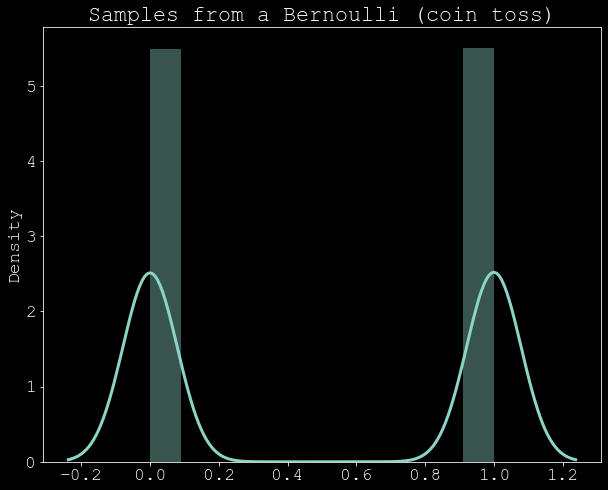

In [22]:
bernoulli = distribution.Bernoulli(0.5)
samples = bernoulli.sample((10000,))
plt.figure(figsize=(10,8))
sns.distplot(samples)
plt.title("Samples from a Bernoulli (coin toss)")
plt.show()

However, we can also _sample_ from the distribution to have individual values of a single throw. In that case, we obtain a series of separate events that _follow_ the distribution 

In [23]:
vals = ['heads', 'tails']
samples = bernoulli.sample((10, ))
for s in samples:
    print('Coin is tossed on ' + vals[int(s)])

Coin is tossed on tails
Coin is tossed on tails
Coin is tossed on tails
Coin is tossed on tails
Coin is tossed on heads
Coin is tossed on tails
Coin is tossed on tails
Coin is tossed on heads
Coin is tossed on heads
Coin is tossed on heads


Now, we can mess up our probability to model an unfair (loaded) coin, as shown in the following example (where we use a cheated coin that should give us a lot more of _heads_ than _tails_) 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


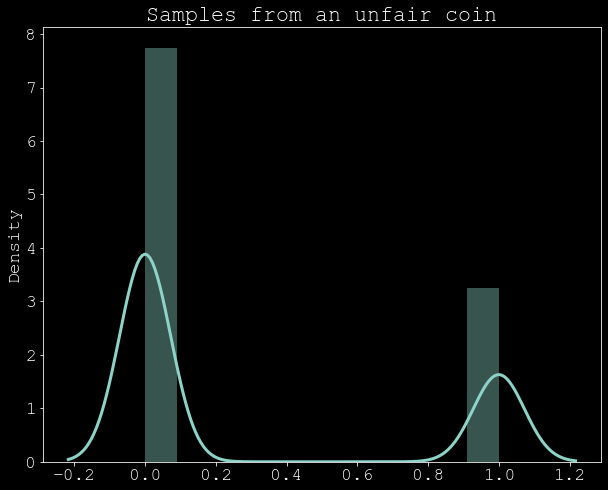

Coin is tossed on heads
Coin is tossed on heads
Coin is tossed on tails
Coin is tossed on tails
Coin is tossed on heads
Coin is tossed on heads
Coin is tossed on heads
Coin is tossed on heads
Coin is tossed on heads
Coin is tossed on tails


In [29]:
bernoulli = distribution.Bernoulli(0.3)
samples = bernoulli.sample((10000,))
plt.figure(figsize=(10, 8)); sns.distplot(samples)
plt.title("Samples from an unfair coin"); plt.show()
vals = ['heads', 'tails']
samples = bernoulli.sample((10, ))
for s in samples:
    print('Coin is tossed on ' + vals[int(s)])

#### Poisson distribution

Let's introduce one of the (many) useful probability mass functions. We say $Z$ is *Poisson*-distributed if:

$$
\begin{equation}
P\left(Z = k\right) =\frac{ \lambda^k e^{-\lambda} }{k!}, \; \; k \in \mathbb{N^{+}} 
\end{equation}
$$

$\lambda \in \mathbb{R}$ is a parameter of the distribution that controls its shape (usually termed the *intensity* of the Poisson distribution). By increasing $\lambda$, we add more probability to larger values. One can describe $\lambda$ as the *intensity* of the Poisson distribution. If a random variable $Z$ has a Poisson mass distribution, we denote it by

$$
\begin{equation}
Z \sim \text{Poi}(\lambda) 
\end{equation}
$$

One useful property of the Poisson distribution is that its expected value is equal to its parameter, i.e.:

$$E\large[ \;Z\; | \; \lambda \;\large] = \lambda $$

We will plot the probability mass distribution for different $\lambda$ values.

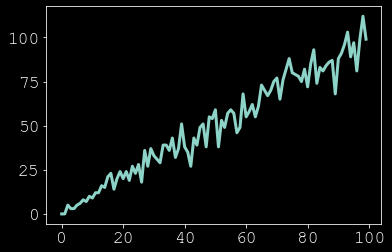

In [36]:
lam=torch.tensor(numpy.arange(0,100,1, dtype=float))
poiss=torch.poisson(lam)

plt.plot(lam,poiss)
plt.show()



### Continuous distributions

The same ideas apply to _continuous_ random variables, which can model for instance the height of human beings. If we try to guess the height of someone that we do not know, there is a higher probability that this person will be around 1m70, instead of 20cm or 3m. For the rest of this course, we will use the shorthand notation $p(\mathbf{x})$ for the distribution $p(\mathbf{x}=x_{i})$,  which expresses for a real-valued random variable $\mathbf{x}$, evaluated at $x_{i}$, the probability that $\mathbf{x}$ takes the value $x_i$.

One notorious example of such distributions is the Gaussian (or Normal) distribution, which is defined as 
\begin{equation}
    p(x)=\mathcal{N}(\mu,\sigma)=\frac{1}{\sqrt{2\pi\sigma^{2}}}e^{-\frac{(x-\mu)^{2}}{2\sigma^{2}}}
\end{equation}

Similarly as before, we can observe the behavior of this distribution with the following code (in our height example)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


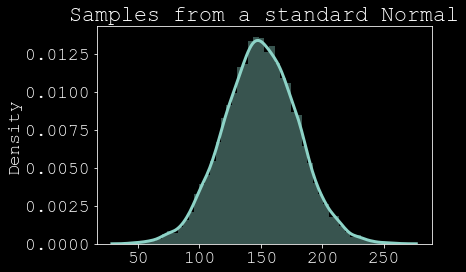

In [5]:
normal = distribution.Normal(150., 30.)
samples = normal.sample((10000, ))
sns.distplot(samples)
plt.title("Samples from a standard Normal")
plt.show()

If we have access to this complete probability distribution (its exact parameterization and function), we can generate samples (in this case "new humans") that follow the correct distribution. You can experiment with this in the following code space.

In [77]:
import random


L=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V']

def name_generator():
    l=np.random.randint(1,10)
    name_array=random.sample(L,l)
    name=name_array[0]
    for l in name_array[1::]:
        name+=l
    return(name)
  
def gender_generator():
    s=np.random.randint(0,1)
    return('Male'*s+'Female'*(1-s))

def height_generator(distribution_law):
    return(distribution_law.sample_n(1).item())

def new_human(distribution_law):
    new_human={'Name':0,'Gender':0,'Height':0}
    new_human['Name']=name_generator()
    new_human['Gender']=gender_generator()
    new_human['Height']=height_generator(distribution_law)
    
    return(new_human)

print(new_human(normal))

{'Name': 'RODU', 'Gender': 'Female', 'Height': 173.29493713378906}


An example of continuous random variable is a random variable with *exponential density*

$$
\begin{equation}
f_Z(z | \lambda) = \lambda e^{-\lambda z }, \;\; z\ge 0
\end{equation}
$$

When a random variable $Z$ has an exponential distribution with parameter $\lambda$, we say *$Z$ is exponential*

$$Z \sim \text{Exp}(\lambda)$$

Given a specific $\lambda$, the expected value of an exponential random variable is equal to the inverse of $\lambda$, that is

$$E[\; Z \;|\; \lambda \;] = \frac{1}{\lambda}$$ 

<a id="distribs"></a>
### PyTorch distributions

Here, we rely on the [PyTorch distributions module](https://pytorch.org/docs/stable/_modules/torch/distributions/), which is defined in `torch.distributions`. Most notably, we are going to rely both on the `Distribution` and `Transform` objects.

In [7]:
# Imports for plotting
import numpy as np
import matplotlib.pyplot as plt
# Define grids of points (for later plots)
x = np.linspace(-4, 4, 1000)
z = np.array(np.meshgrid(x, x)).transpose(1, 2, 0)
z = np.reshape(z, [z.shape[0] * z.shape[1], -1])

Inside this toolbox, we can already find some of the major probability distributions that we are used to deal with


In [89]:
p1 = distribution.Normal(loc=0, scale=1)
p2 = distribution.Bernoulli(probs=torch.tensor([0.5]))
p3 = distribution.Beta(concentration1=torch.tensor([0.5]), concentration0=torch.tensor([0.5]))
p4 = distribution.Gamma(concentration=torch.tensor([1.0]), rate=torch.tensor([1.0]))
p5 = distribution.Pareto(alpha=torch.tensor([1.0]), scale=torch.tensor([1.0]))

The interesting aspect of these `Distribution` objects is that we can both obtain some samples from it through the `sample` (or `sample_n`) function, but we can also obtain the analytical density at any given point through the `log_prob` function

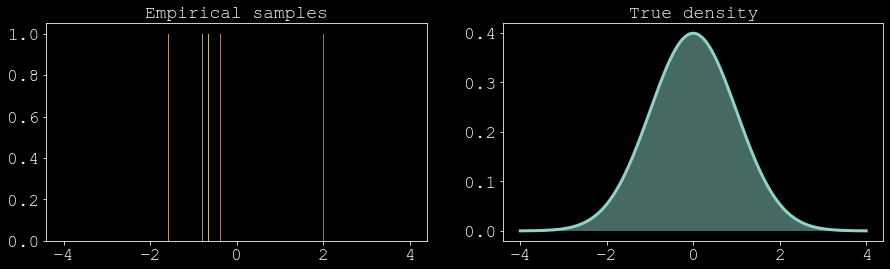

In [90]:
# Based on a normal
n = distribution.Normal(0, 1)
# Obtain some samples
samples = n.sample((1000, ))
# Evaluate true density at given points
density = torch.exp(n.log_prob(torch.Tensor(x))).numpy()
# Plot both samples and density
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(15, 4))
ax1.hist(samples, 50, alpha=0.8);
ax1.set_title('Empirical samples', fontsize=18);
ax2.plot(x, density); ax2.fill_between(x, density, 0, alpha=0.5)
ax2.set_title('True density', fontsize=18);

Here you can experiment with different distributions, and try to compare how they behave depending on their parameters and also on how much _samples_ you draw from these.

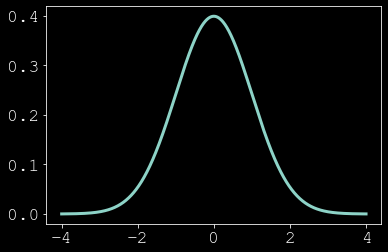

ValueError: Expected value argument (Tensor of shape (1000,)) to be within the support (Boolean()) of the distribution Bernoulli(probs: tensor([0.5000])), but found invalid values:
tensor([0.0000, 0.0010, 0.0020, 0.0030, 0.0040, 0.0050, 0.0060, 0.0070, 0.0080,
        0.0090, 0.0100, 0.0110, 0.0120, 0.0130, 0.0140, 0.0150, 0.0160, 0.0170,
        0.0180, 0.0190, 0.0200, 0.0210, 0.0220, 0.0230, 0.0240, 0.0250, 0.0260,
        0.0270, 0.0280, 0.0290, 0.0300, 0.0310, 0.0320, 0.0330, 0.0340, 0.0350,
        0.0360, 0.0370, 0.0380, 0.0390, 0.0400, 0.0410, 0.0420, 0.0430, 0.0440,
        0.0450, 0.0460, 0.0470, 0.0480, 0.0490, 0.0501, 0.0511, 0.0521, 0.0531,
        0.0541, 0.0551, 0.0561, 0.0571, 0.0581, 0.0591, 0.0601, 0.0611, 0.0621,
        0.0631, 0.0641, 0.0651, 0.0661, 0.0671, 0.0681, 0.0691, 0.0701, 0.0711,
        0.0721, 0.0731, 0.0741, 0.0751, 0.0761, 0.0771, 0.0781, 0.0791, 0.0801,
        0.0811, 0.0821, 0.0831, 0.0841, 0.0851, 0.0861, 0.0871, 0.0881, 0.0891,
        0.0901, 0.0911, 0.0921, 0.0931, 0.0941, 0.0951, 0.0961, 0.0971, 0.0981,
        0.0991, 0.1001, 0.1011, 0.1021, 0.1031, 0.1041, 0.1051, 0.1061, 0.1071,
        0.1081, 0.1091, 0.1101, 0.1111, 0.1121, 0.1131, 0.1141, 0.1151, 0.1161,
        0.1171, 0.1181, 0.1191, 0.1201, 0.1211, 0.1221, 0.1231, 0.1241, 0.1251,
        0.1261, 0.1271, 0.1281, 0.1291, 0.1301, 0.1311, 0.1321, 0.1331, 0.1341,
        0.1351, 0.1361, 0.1371, 0.1381, 0.1391, 0.1401, 0.1411, 0.1421, 0.1431,
        0.1441, 0.1451, 0.1461, 0.1471, 0.1481, 0.1491, 0.1502, 0.1512, 0.1522,
        0.1532, 0.1542, 0.1552, 0.1562, 0.1572, 0.1582, 0.1592, 0.1602, 0.1612,
        0.1622, 0.1632, 0.1642, 0.1652, 0.1662, 0.1672, 0.1682, 0.1692, 0.1702,
        0.1712, 0.1722, 0.1732, 0.1742, 0.1752, 0.1762, 0.1772, 0.1782, 0.1792,
        0.1802, 0.1812, 0.1822, 0.1832, 0.1842, 0.1852, 0.1862, 0.1872, 0.1882,
        0.1892, 0.1902, 0.1912, 0.1922, 0.1932, 0.1942, 0.1952, 0.1962, 0.1972,
        0.1982, 0.1992, 0.2002, 0.2012, 0.2022, 0.2032, 0.2042, 0.2052, 0.2062,
        0.2072, 0.2082, 0.2092, 0.2102, 0.2112, 0.2122, 0.2132, 0.2142, 0.2152,
        0.2162, 0.2172, 0.2182, 0.2192, 0.2202, 0.2212, 0.2222, 0.2232, 0.2242,
        0.2252, 0.2262, 0.2272, 0.2282, 0.2292, 0.2302, 0.2312, 0.2322, 0.2332,
        0.2342, 0.2352, 0.2362, 0.2372, 0.2382, 0.2392, 0.2402, 0.2412, 0.2422,
        0.2432, 0.2442, 0.2452, 0.2462, 0.2472, 0.2482, 0.2492, 0.2503, 0.2513,
        0.2523, 0.2533, 0.2543, 0.2553, 0.2563, 0.2573, 0.2583, 0.2593, 0.2603,
        0.2613, 0.2623, 0.2633, 0.2643, 0.2653, 0.2663, 0.2673, 0.2683, 0.2693,
        0.2703, 0.2713, 0.2723, 0.2733, 0.2743, 0.2753, 0.2763, 0.2773, 0.2783,
        0.2793, 0.2803, 0.2813, 0.2823, 0.2833, 0.2843, 0.2853, 0.2863, 0.2873,
        0.2883, 0.2893, 0.2903, 0.2913, 0.2923, 0.2933, 0.2943, 0.2953, 0.2963,
        0.2973, 0.2983, 0.2993, 0.3003, 0.3013, 0.3023, 0.3033, 0.3043, 0.3053,
        0.3063, 0.3073, 0.3083, 0.3093, 0.3103, 0.3113, 0.3123, 0.3133, 0.3143,
        0.3153, 0.3163, 0.3173, 0.3183, 0.3193, 0.3203, 0.3213, 0.3223, 0.3233,
        0.3243, 0.3253, 0.3263, 0.3273, 0.3283, 0.3293, 0.3303, 0.3313, 0.3323,
        0.3333, 0.3343, 0.3353, 0.3363, 0.3373, 0.3383, 0.3393, 0.3403, 0.3413,
        0.3423, 0.3433, 0.3443, 0.3453, 0.3463, 0.3473, 0.3483, 0.3493, 0.3504,
        0.3514, 0.3524, 0.3534, 0.3544, 0.3554, 0.3564, 0.3574, 0.3584, 0.3594,
        0.3604, 0.3614, 0.3624, 0.3634, 0.3644, 0.3654, 0.3664, 0.3674, 0.3684,
        0.3694, 0.3704, 0.3714, 0.3724, 0.3734, 0.3744, 0.3754, 0.3764, 0.3774,
        0.3784, 0.3794, 0.3804, 0.3814, 0.3824, 0.3834, 0.3844, 0.3854, 0.3864,
        0.3874, 0.3884, 0.3894, 0.3904, 0.3914, 0.3924, 0.3934, 0.3944, 0.3954,
        0.3964, 0.3974, 0.3984, 0.3994, 0.4004, 0.4014, 0.4024, 0.4034, 0.4044,
        0.4054, 0.4064, 0.4074, 0.4084, 0.4094, 0.4104, 0.4114, 0.4124, 0.4134,
        0.4144, 0.4154, 0.4164, 0.4174, 0.4184, 0.4194, 0.4204, 0.4214, 0.4224,
        0.4234, 0.4244, 0.4254, 0.4264, 0.4274, 0.4284, 0.4294, 0.4304, 0.4314,
        0.4324, 0.4334, 0.4344, 0.4354, 0.4364, 0.4374, 0.4384, 0.4394, 0.4404,
        0.4414, 0.4424, 0.4434, 0.4444, 0.4454, 0.4464, 0.4474, 0.4484, 0.4494,
        0.4505, 0.4515, 0.4525, 0.4535, 0.4545, 0.4555, 0.4565, 0.4575, 0.4585,
        0.4595, 0.4605, 0.4615, 0.4625, 0.4635, 0.4645, 0.4655, 0.4665, 0.4675,
        0.4685, 0.4695, 0.4705, 0.4715, 0.4725, 0.4735, 0.4745, 0.4755, 0.4765,
        0.4775, 0.4785, 0.4795, 0.4805, 0.4815, 0.4825, 0.4835, 0.4845, 0.4855,
        0.4865, 0.4875, 0.4885, 0.4895, 0.4905, 0.4915, 0.4925, 0.4935, 0.4945,
        0.4955, 0.4965, 0.4975, 0.4985, 0.4995, 0.5005, 0.5015, 0.5025, 0.5035,
        0.5045, 0.5055, 0.5065, 0.5075, 0.5085, 0.5095, 0.5105, 0.5115, 0.5125,
        0.5135, 0.5145, 0.5155, 0.5165, 0.5175, 0.5185, 0.5195, 0.5205, 0.5215,
        0.5225, 0.5235, 0.5245, 0.5255, 0.5265, 0.5275, 0.5285, 0.5295, 0.5305,
        0.5315, 0.5325, 0.5335, 0.5345, 0.5355, 0.5365, 0.5375, 0.5385, 0.5395,
        0.5405, 0.5415, 0.5425, 0.5435, 0.5445, 0.5455, 0.5465, 0.5475, 0.5485,
        0.5495, 0.5506, 0.5516, 0.5526, 0.5536, 0.5546, 0.5556, 0.5566, 0.5576,
        0.5586, 0.5596, 0.5606, 0.5616, 0.5626, 0.5636, 0.5646, 0.5656, 0.5666,
        0.5676, 0.5686, 0.5696, 0.5706, 0.5716, 0.5726, 0.5736, 0.5746, 0.5756,
        0.5766, 0.5776, 0.5786, 0.5796, 0.5806, 0.5816, 0.5826, 0.5836, 0.5846,
        0.5856, 0.5866, 0.5876, 0.5886, 0.5896, 0.5906, 0.5916, 0.5926, 0.5936,
        0.5946, 0.5956, 0.5966, 0.5976, 0.5986, 0.5996, 0.6006, 0.6016, 0.6026,
        0.6036, 0.6046, 0.6056, 0.6066, 0.6076, 0.6086, 0.6096, 0.6106, 0.6116,
        0.6126, 0.6136, 0.6146, 0.6156, 0.6166, 0.6176, 0.6186, 0.6196, 0.6206,
        0.6216, 0.6226, 0.6236, 0.6246, 0.6256, 0.6266, 0.6276, 0.6286, 0.6296,
        0.6306, 0.6316, 0.6326, 0.6336, 0.6346, 0.6356, 0.6366, 0.6376, 0.6386,
        0.6396, 0.6406, 0.6416, 0.6426, 0.6436, 0.6446, 0.6456, 0.6466, 0.6476,
        0.6486, 0.6496, 0.6507, 0.6517, 0.6527, 0.6537, 0.6547, 0.6557, 0.6567,
        0.6577, 0.6587, 0.6597, 0.6607, 0.6617, 0.6627, 0.6637, 0.6647, 0.6657,
        0.6667, 0.6677, 0.6687, 0.6697, 0.6707, 0.6717, 0.6727, 0.6737, 0.6747,
        0.6757, 0.6767, 0.6777, 0.6787, 0.6797, 0.6807, 0.6817, 0.6827, 0.6837,
        0.6847, 0.6857, 0.6867, 0.6877, 0.6887, 0.6897, 0.6907, 0.6917, 0.6927,
        0.6937, 0.6947, 0.6957, 0.6967, 0.6977, 0.6987, 0.6997, 0.7007, 0.7017,
        0.7027, 0.7037, 0.7047, 0.7057, 0.7067, 0.7077, 0.7087, 0.7097, 0.7107,
        0.7117, 0.7127, 0.7137, 0.7147, 0.7157, 0.7167, 0.7177, 0.7187, 0.7197,
        0.7207, 0.7217, 0.7227, 0.7237, 0.7247, 0.7257, 0.7267, 0.7277, 0.7287,
        0.7297, 0.7307, 0.7317, 0.7327, 0.7337, 0.7347, 0.7357, 0.7367, 0.7377,
        0.7387, 0.7397, 0.7407, 0.7417, 0.7427, 0.7437, 0.7447, 0.7457, 0.7467,
        0.7477, 0.7487, 0.7497, 0.7508, 0.7518, 0.7528, 0.7538, 0.7548, 0.7558,
        0.7568, 0.7578, 0.7588, 0.7598, 0.7608, 0.7618, 0.7628, 0.7638, 0.7648,
        0.7658, 0.7668, 0.7678, 0.7688, 0.7698, 0.7708, 0.7718, 0.7728, 0.7738,
        0.7748, 0.7758, 0.7768, 0.7778, 0.7788, 0.7798, 0.7808, 0.7818, 0.7828,
        0.7838, 0.7848, 0.7858, 0.7868, 0.7878, 0.7888, 0.7898, 0.7908, 0.7918,
        0.7928, 0.7938, 0.7948, 0.7958, 0.7968, 0.7978, 0.7988, 0.7998, 0.8008,
        0.8018, 0.8028, 0.8038, 0.8048, 0.8058, 0.8068, 0.8078, 0.8088, 0.8098,
        0.8108, 0.8118, 0.8128, 0.8138, 0.8148, 0.8158, 0.8168, 0.8178, 0.8188,
        0.8198, 0.8208, 0.8218, 0.8228, 0.8238, 0.8248, 0.8258, 0.8268, 0.8278,
        0.8288, 0.8298, 0.8308, 0.8318, 0.8328, 0.8338, 0.8348, 0.8358, 0.8368,
        0.8378, 0.8388, 0.8398, 0.8408, 0.8418, 0.8428, 0.8438, 0.8448, 0.8458,
        0.8468, 0.8478, 0.8488, 0.8498, 0.8509, 0.8519, 0.8529, 0.8539, 0.8549,
        0.8559, 0.8569, 0.8579, 0.8589, 0.8599, 0.8609, 0.8619, 0.8629, 0.8639,
        0.8649, 0.8659, 0.8669, 0.8679, 0.8689, 0.8699, 0.8709, 0.8719, 0.8729,
        0.8739, 0.8749, 0.8759, 0.8769, 0.8779, 0.8789, 0.8799, 0.8809, 0.8819,
        0.8829, 0.8839, 0.8849, 0.8859, 0.8869, 0.8879, 0.8889, 0.8899, 0.8909,
        0.8919, 0.8929, 0.8939, 0.8949, 0.8959, 0.8969, 0.8979, 0.8989, 0.8999,
        0.9009, 0.9019, 0.9029, 0.9039, 0.9049, 0.9059, 0.9069, 0.9079, 0.9089,
        0.9099, 0.9109, 0.9119, 0.9129, 0.9139, 0.9149, 0.9159, 0.9169, 0.9179,
        0.9189, 0.9199, 0.9209, 0.9219, 0.9229, 0.9239, 0.9249, 0.9259, 0.9269,
        0.9279, 0.9289, 0.9299, 0.9309, 0.9319, 0.9329, 0.9339, 0.9349, 0.9359,
        0.9369, 0.9379, 0.9389, 0.9399, 0.9409, 0.9419, 0.9429, 0.9439, 0.9449,
        0.9459, 0.9469, 0.9479, 0.9489, 0.9499, 0.9510, 0.9520, 0.9530, 0.9540,
        0.9550, 0.9560, 0.9570, 0.9580, 0.9590, 0.9600, 0.9610, 0.9620, 0.9630,
        0.9640, 0.9650, 0.9660, 0.9670, 0.9680, 0.9690, 0.9700, 0.9710, 0.9720,
        0.9730, 0.9740, 0.9750, 0.9760, 0.9770, 0.9780, 0.9790, 0.9800, 0.9810,
        0.9820, 0.9830, 0.9840, 0.9850, 0.9860, 0.9870, 0.9880, 0.9890, 0.9900,
        0.9910, 0.9920, 0.9930, 0.9940, 0.9950, 0.9960, 0.9970, 0.9980, 0.9990,
        1.0000], dtype=torch.float64)

In [120]:
density1=torch.exp(p1.log_prob(torch.tensor(x))).numpy()
plt.plot(x,density1)
plt.show()

#sample1=p1.sample((1000, ))
density2=torch.exp(p2.log_prob(torch.tensor(x))).numpy()
plt.plot(x,density2)
plt.show()

#sample2=p2.sample((1000, ))

density3=torch.exp(p3.log_prob(torch.tensor(x))).numpy()
plt.plot(x,density3)
plt.show()

#sample1=p3.sample((1000, ))

density4=torch.exp(p4.log_prob(torch.tensor(x))).numpy()
plt.plot(x,density4)
plt.show()

#sample4=p4.sample((1000, ))

#plt.figure(figsize=(10, 8)); sns.distplot(density1)

<a id="sampling"></a>
## Sampling from distributions

The advantage of using probability distributions is that we can *sample* from these to obtain examples that follow the distribution. For instance, if we perform sampling repeatedly (up to infinity) from a Gaussian PDF, the different values will be distributed following the exact Gaussian distribution. However, although we know the PDF, we need to compute the *Cumulative Distribution Function* (CDF), and then its inverse to obtain the sampling function. Therefore, if we denote the PDF as $f_{X}(x)$, we need to compute the CDF 

$$
\begin{equation}
F_{X}\left(x\right)=\intop_{\infty}^{x}f_{X}\left(t\right)dt
\end{equation}
$$

Then, the *inverse sampling method* consists in solving and applying the inverse CDF $F_{X}^{-1}\left(x\right)$. Here, we recall that the Exponential probability is defined with the following function.

$$
p_{\lambda}(x) = \lambda e^{-\lambda x}
$$

with $\lambda$ defining the _rate_ parameter. Therefore, to be able to define our own `sample` method, we need to solve for

$$
F^{-1}_Y(x) = \left(\int_0^x \lambda e^{-\lambda y} dy\right)^{-1}
$$

***

**Exercise**

1. Code the exponential probability density functions 
2. Perform the inverse transform method on the exponential distribution PDF
3. Code the `sample_exponential` function to sample from the exponential
4. (optional) Perform the same operations for sampling from the Beta distribution

***

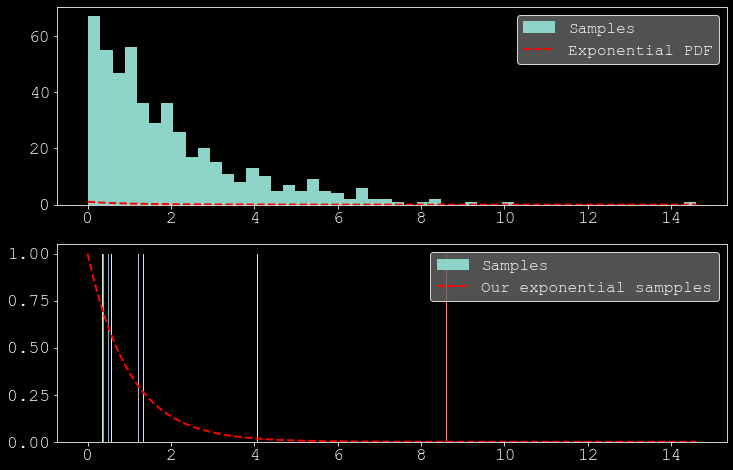

In [102]:
from scipy.stats import expon
nb_samples = 500
nb_bins = 50

def sample_exponential(mu, n, m):
    
    samples = np.random.uniform(0, 1, size=(m,n))
    samples = - np.log(1 - samples) 
    samples *= mu
    
    return samples

# Exponential distribution
mu = 2
samples = np.random.exponential(mu, nb_samples)
samples_ex = sample_exponential(mu, nb_samples, 1)
# Compute the PDF
X = np.linspace(0, np.max(samples), int(np.max(samples)) * 100)
y1 = expon.pdf(X) #* (nb_samples / nb_bins) * int(np.max(samples) * 1.5)
# Display both
plt.figure(figsize=(12, 8))
plt.subplot(2,1,1)
plt.hist(samples, 50, label='Samples')
plt.plot(X,y1,ls='--',c='r',linewidth=2, label='Exponential PDF')
plt.legend(loc=1)
plt.subplot(2,1,2)
plt.hist(samples_ex, 50, label='Samples')
plt.plot(X,y1,ls='--',c='r',linewidth=2, label='Our exponential sampples')
plt.legend(loc=1)

In [103]:
def sampleBeta(a, b, M, N):
    
    ######################
    # YOUR CODE GOES HERE
    ######################
    
    ######################
    # Solution

    samples = np.random.beta(a, b, size=(M, N))
    
    ######################
    
    return samples

from scipy.stats import beta
# Beta distribution
a = 0.6
b = 1.5
samples = np.random.beta(a, b, nbSamples)
samplesBeta = sampleBeta(a, b, nbSamples, 1)
# Compute the PDF
X = np.linspace(0, 1, 100)
y1 = beta.pdf(X, a, b) * (nbSamples / nbBins) * (np.max(samples) * 1.5)
# Display both
plt.figure(figsize=(12, 8))
plt.subplot(2,1,1)
plt.hist(samples, 50, label='Samples')
plt.plot(X,y1,ls='--',c='r',linewidth=2, label='Beta PDF')
plt.legend(loc=1)
plt.subplot(2,1,2)
plt.hist(samplesBeta, 50, label='Samples')
plt.plot(X,y1,ls='--',c='r',linewidth=2, label='Beta PDF')
plt.legend(loc=1)

NameError: name 'nbSamples' is not defined

### Comparing distributions (KL divergence)
$
\newcommand{\R}{\mathbb{R}}
\newcommand{\bb}[1]{\mathbf{#1}}
\newcommand{\bx}{\bb{x}}
\newcommand{\by}{\bb{y}}
\newcommand{\bz}{\bb{z}}
\newcommand{\KL}[2]{\mathcal{D}_{\text{KL}}\left[#1 \| #2\right]}$
Originally defined in the field of information theory, the _Kullback-Leibler (KL) divergence_ (usually noted $\KL{p(\bx)}{q(\bx)}$) is a dissimilarity measure between two probability distributions $p(\bx)$ and $q(\bx)$. In the view of information theory, it can be understood as the cost in number of bits necessary for coding samples from $p(\bx)$ by using a code optimized for $q(\bx)$ rather than the code optimized for $p(\bx)$. In the view of probability theory, it represents the amount of information lost when we use $q(\bx)$ to approximate the true distribution $p(\bx)$. %that explicit the cost incurred if events were generated by $p(\bx)$ but charged under $q(\bx)$


Given two probability distributions $p(\bx)$ and $q(\bx)$, the Kullback-Leibler divergence of $q(\bx)$ _from_ $p(\bx)$ is defined to be
\begin{equation}
    \KL{p(\bx)}{q(\bx)}=\int_{\R} p(\bx) \log \frac{p(\bx)}{q(\bx)}d\bx
\end{equation}

Note that this dissimilarity measure is _asymmetric_, therefore, we have
\begin{equation}
    \KL{p(\bx)}{q(\bx)}\neq \KL{q(\bx)}{p(\bx)}
\end{equation}
This asymmetry also describes an interesting behavior of the KL divergence, depending on the order to which it is evaluated. The KL divergence can either be a _mode-seeking_ or _mode-coverage_ measure (we will come back to these notions in the _approximate inference_ course)